## USA Election | Data Analysis 
### An analysis on the US Presidential Election from 2012 to 2016
*By Badr Worrell, Camila Cois, James Tedrow and Mudit Mathur* 

#### Primary Question: What were shared characteristics, of counties, in the 2012 to 2016 U.S. Presidential elections, that flipped from Barack Obama to Donald Trump?

From our analysis, we yielded interesting shared characteristics for counties that switched from voting Obama in 2012 to voting Trump in 2016. Poverty levels of those counties that switched, and percentage of white people of counties that switched were 2 major variables that resulted in counties switching their votes from Democrat to Republican in the past 2 general elections.

-First is from the 2 charts comparing the distrubution of white population within total US Counties to the distrubution of white population within switched (Democrat to Republican) counties. There is a noticeable uptick in the with counties approaching 50% white population to have switched. This could indicate a more tense racial environment of counties with around 50% white population that made them ripe for switching. 

-The second observation comes from looking into specific county data for Iowa -- a battleground state that swung to Trump with a high percentage of counties switching. The map of Iowa counties shows that many states with a high poverty percentage were among those to switch from Obama to Trump.

#### 2nd question: How significant was the change in counties that changed their vote from Democrat in 2012 to Republican in 2016?

-We found this to be one of the most significant statistics gathered from our data. As shown in the bar chart of "Total # of Counties that Flipped b/w Parties | Elections 2012 - 2016", we see a shocking disparity of counties that switched from Dem to Rep than Rep to Dem. In fact, the bar chart displays a nearly 8 times (800%) higher bar for the switch from Republicans to Democrats!
#### 3rd question: How polarizing was this election, given the data of "other" votes?

-This was also one of the significant statistics that we gathered from our data. From the pie charts of % votes in the 2012 and % of votes in the 2016 election, we see that people voting for "Other" increased by about 3x from 2012 to 2016. We also notice from this chart that the democratic candidate got the majority of votes in both elections. This did not result in a win for Clinton in 2016 however. 

We had fun deep diving into how the electoral college played it's role in helping Trump win the Presidency. And the impact of demographics by county for controlling key battleground states, such as Iowa. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

 #### DATA WRANGLING - CLEAN US ELECTION DATA 2012

In [2]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]
df_2016.columns

Index(['year', 'state', 'state_po', 'county', 'FIPS', 'office', 'candidate',
       'party', 'candidatevotes', 'totalvotes', 'version'],
      dtype='object')

In [3]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state", "state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)

#Create column for winner and margin of victory
election_2012["Winner"] = np.where(election_2012['Barack Obama']>election_2012["Mitt Romney"], 'Barack Obama', 'Mitt Romney')
election_2012["Margin"] = np.where(election_2012["Winner"]=="Mitt Romney", 
                                   election_2012["Mitt Romney"]-election_2012["Barack Obama"],
                                   election_2012["Barack Obama"]-election_2012["Mitt Romney"])
#Preview results
election_2012.head(10)


Barack Obama  Mitt Romney  Other  Total Votes  \
state   state_po county                                                    
Alabama AL       Autauga           6363        17379    190        23932   
                 Baldwin          18424        66016    898        85338   
                 Barbour           5912         5550     47        11509   
                 Bibb              2202         6132     86         8420   
                 Blount            2970        20757    279        24006   
                 Bullock           4061         1251     10         5322   
                 Butler            4374         5087     35         9496   
                 Calhoun          15511        30278    468        46257   
                 Chambers          6871         7626    114        14611   
                 Cherokee          2132         7506    141         9779   

                                 Winner  Margin  
state   state_po county                          
Alabama AL       Autauga    Mitt Romney   11016  
                 Baldwin    Mitt Romney   47592  
                 Barbour   Barack Obama     362  
                 Bibb       Mitt Romney    3930  
                 Blount     Mitt Romney   17787  
                 Bullock   Barack Obama    2810  
                 Butler     Mitt Romney     713  
                 Calhoun    Mitt Romney   14767  
                 Chambers   Mitt Romney     755  
                 Cherokee   Mitt Romney    5374

#### GRAPH 1 - PIE CHART - US ELECTION DATA 2012

In [4]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()


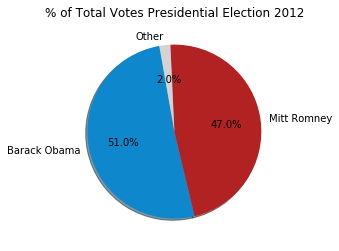

In [5]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Save figure
plt.savefig("Images/total_votes_2012.png")

#Show pie chart
plt.show()

#### DATA WRANGLING - CLEAN US ELECTION DATA 2016

In [6]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2016 = merged_2016.groupby(["state","state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Create column for winner and margin of victory
election_2016["Winner"] = np.where(election_2016['Hillary Clinton']>election_2016["Donald Trump"], 'Hillary Clinton', 'Donald Trump')
election_2016["Margin"] = np.where(election_2016["Winner"]=="Donald Trump", 
                                   election_2016["Donald Trump"]-election_2016["Hillary Clinton"],
                                   election_2016["Hillary Clinton"]-election_2016["Donald Trump"])
#Preview results
election_2016.head(10)


Donald Trump  Hillary Clinton  Other  Total Votes  \
state   state_po county                                                        
Alabama AL       Autauga          18172             5936    865        24973   
                 Baldwin          72883            18458   3874        95215   
                 Barbour           5454             4871    144        10469   
                 Bibb              6738             1874    207         8819   
                 Blount           22859             2156    573        25588   
                 Bullock           1140             3530     40         4710   
                 Butler            4901             3726    105         8732   
                 Calhoun          32865            13242   1757        47864   
                 Chambers          7843             5784    273        13900   
                 Cherokee          8953             1547    233        10733   

                                    Winner  Margin  
state   state_po county                             
Alabama AL       Autauga      Donald Trump   12236  
                 Baldwin      Donald Trump   54425  
                 Barbour      Donald Trump     583  
                 Bibb         Donald Trump    4864  
                 Blount       Donald Trump   20703  
                 Bullock   Hillary Clinton    2390  
                 Butler       Donald Trump    1175  
                 Calhoun      Donald Trump   19623  
                 Chambers     Donald Trump    2059  
                 Cherokee     Donald Trump    7406

#### GRAPH 2 - PIE CHART - US ELECTION DATA 2016

In [7]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

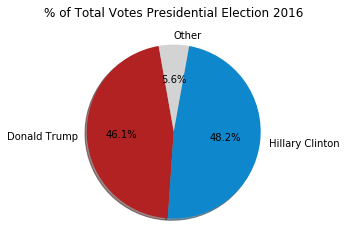

In [8]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Save figure
plt.savefig("Images/total_votes_2016.png")

#Show pie chart
plt.show()

#### DATA MERGE | US ELECTION 2012 & US ELECTION 2016

In [9]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Create column for percent change between total votes in 2012 and 2016
election_df["Total_Votes_Percent_Change"] = round((election_df["Total Votes_2016"] - election_df["Total Votes_2012"]) / election_df["Total Votes_2012"] * 100,2)

#Show results
election_df.head(10)

#export as CSV
election_df.reset_index().to_csv("2012_2016_election.csv")

#### GRAPH 3: BAR CHART ON MERGED ELECTION DATA 2012 2016

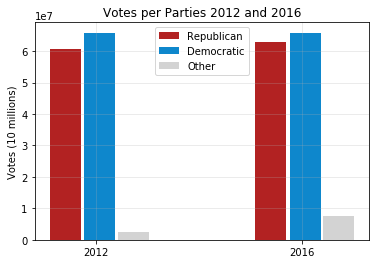

In [10]:
republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Save figure
plt.savefig("Images/total_votes_12_16.png")

#Show bar chart
plt.show()

In [11]:
#Store number of counties that changed parties between 2012 and 2016
#dem_rep_df = pd.DataFrame(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])

Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
Rep_Dem = len(election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")])

#### DATA WRANGLING - CLEAN DEMOGRAPHIC DATA

In [12]:
#Read in demographic data
demo_df = pd.read_csv("demographic_data.csv")

#Split data in county on the comma, replace "county" with ""
demo_df['county'] = demo_df['county'].str.split(',').str[0]
demo_df["county"] = demo_df.county.str.replace(" County", "",)

#Group data, export if necessary
grouped_demo = demo_df.groupby(["state", "county"]).sum()
#grouped_demo.reset_index().to_csv("grouped_demo.csv")

#Read in income and poverty data
income_df = pd.read_csv("income_data.csv")

#Replace "Parish" with ""
income_df["Name"] = income_df.Name.str.replace(" Parish", "")

#Replace "County" with ""
income_df["Name"] = income_df.Name.str.replace(" County", "")

#Replace "city" with ""
income_df["Name"] = income_df.Name.str.replace(" city", "")

income_df = income_df[["Postal Code", "Name", "Poverty Percent, All Ages", "Median Household Income"]]

#Display Data Frame
income_df.head()

,Postal Code,Name,"Poverty Percent, All Ages",Median Household Income
0,HI,Kalawao,.,.
1,VA,Loudoun,3.0,"136,191"
2,VA,Falls Church,3.4,"123,923"
3,CA,Santa Clara,7.5,"118,468"
4,NM,Los Alamos,3.7,"118,380"


In [13]:
#Read in clean data
election = pd.read_csv("2012_2016_election.csv")
demographics = pd.read_csv("demo_clean.csv")

#Replace "Parish" with ""
demographics["county"] = demographics.county.str.replace(" Parish", "")


#### DATA MERGE | US ELECTION 2012 2016 X DEMOGRAPHIC

In [14]:
#Merge dataframes
election_merged = pd.merge(election, demographics)

#Make new columns for dem/rep percent change
election_merged["Dem_Votes_Percent_Change"] = round((election_merged["Hillary Clinton"] - election_merged["Barack Obama"]) / election_merged["Barack Obama"] * 100,2)
election_merged["Rep_Votes_Percent_Change"] = round((election_merged["Donald Trump"] - election_merged["Mitt Romney"]) / election_merged["Mitt Romney"] * 100,2)

#Rename Columns to prepare for merge
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)
income_df.rename(columns={"Name":"county"}, inplace=True)

#Merge Data Frames for Election and Income 
election_merged = pd.merge(election_merged, income_df)
election_merged["Median Household Income"] = election_merged["Median Household Income"].str.replace(",","")
election_merged["Median Household Income"] = election_merged["Median Household Income"].astype("int")
election_merged["Poverty Percent, All Ages"] = election_merged["Poverty Percent, All Ages"].astype("float")

In [15]:
#Rename Column for Postal Code
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)

#Transpose Data Frame
election_merged.T

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148
state,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
Postal Code,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
county,Autauga,Baldwin,Barbour,Bibb,Blount,Bullock,Butler,Calhoun,Chambers,Cherokee,...,Niobrara,Park,Platte,Sheridan,Sublette,Sweetwater,Teton,Uinta,Washakie,Weston
Barack Obama,6363,18424,5912,2202,2970,4061,4374,15511,6871,2132,...,200,2927,1223,3618,767,4774,6213,1628,794,422
Mitt Romney,17379,66016,5550,6132,20757,1251,5087,30278,7626,7506,...,1022,11234,3136,10267,3472,11428,4858,6615,3014,2821
Other_2012,190,898,47,86,279,10,35,468,114,141,...,54,447,172,437,137,693,393,296,136,116
Total Votes_2012,23932,85338,11509,8420,24006,5322,9496,46257,14611,9779,...,1276,14608,4531,14322,4376,16895,11464,8539,3944,3359
Winner_2012,Mitt Romney,Mitt Romney,Barack Obama,Mitt Romney,Mitt Romney,Barack Obama,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,...,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,Barack Obama,Mitt Romney,Mitt Romney,Mitt Romney
Margin_2012,11016,47592,362,3930,17787,2810,713,14767,755,5374,...,822,8307,1913,6649,2705,6654,1355,4987,2220,2399


#### DATAFRAME FOR COUNTIES THAT SWITCHED PARTY COLOR

In [16]:
#Create dataframe for counties that switched
rep_dem_df = election_merged[(election_merged.Winner_2012 == "Mitt Romney") & (election_merged.Winner_2016 == "Hillary Clinton")]
dem_rep_df = election_merged[(election_merged.Winner_2012 == "Barack Obama") & (election_merged.Winner_2016 == "Donald Trump")]

#Find total counts of election populations
total_count = election_merged.state.value_counts()
population = election_merged.groupby("state")["total_population"].sum()
switched_count = dem_rep_df.state.value_counts()

#Create and Clean switch Data Frame 
switch = pd.DataFrame({"switched": switched_count, "total":total_count, "population":population.apply(lambda x: f"{x:,.0f}")})
switch.dropna(inplace=True)
switch["%_Change"] = round(switch.switched / switch.total * 100,0)
switch.sort_values("switched", ascending=False, inplace=True)

#Display Data Frame
switch.head(10)



,switched,total,population,%_Change
Iowa,32.0,100,"3,028,691",32.0
Wisconsin,23.0,72,"5,643,185",32.0
New York,22.0,63,"21,004,399",35.0
Minnesota,18.0,85,"5,040,446",21.0
Michigan,12.0,83,"9,961,406",14.0
Illinois,11.0,101,"12,694,701",11.0
Ohio,9.0,88,"11,524,162",10.0
Maine,8.0,16,"1,322,366",50.0
North Carolina,7.0,100,"9,290,565",7.0
Virginia,7.0,132,"9,205,915",5.0


#### BINS FOR PLOTTING 

In [17]:
#Create bins for plotting
age_bins = [0, 34, 40, 45, 100]
age_names = ["<35", "36-40", "41-45", "$46+"]
income_bins = [0, 34999, 45000, 55000, 65000, 75000, 200000]
income_names = ["<$35,000", "$35,001-$45,000", "$45,001-$55,000", "$55,001-$65,000", "$65,001-$75,000", "$75,001+"]


election_merged["Age Ranges"] = pd.cut(election_merged["median_age"], age_bins, labels = age_names)
election_merged["Median Income Ranges"] = pd.cut(election_merged["Median Household Income"], income_bins, labels = income_names)

#### GRAPHS: HISTOGRAMS AND MAPS MERGED ELECTION DATA X DEMOGRAPHIC

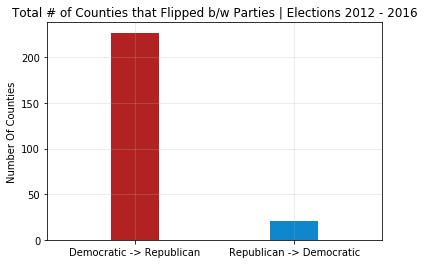

In [18]:
parties_flipped = [Dem_Rep, Rep_Dem]

#The x location
x_axis = np.arange(len(parties_flipped))

#Create the bars
plt.bar(x_axis, parties_flipped, color=('firebrick','#0e87cc'), align="center",  width=0.3)

#Set ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Democratic -> Republican", "Republican -> Democratic"])

# Set the limits of the x axis
plt.xlim(-0.55, len(x_axis)-0.45)

#Add grid
plt.grid(alpha= 0.3)

#Add title and labels
plt.title("Total # of Counties that Flipped b/w Parties | Elections 2012 - 2016")
plt.ylabel("Number Of Counties")

#Save figure
plt.savefig("Images/total_counties_flipped.png")

#Show bar chart
plt.show()

In [19]:
# Sum of switched Counties
switch_sum = dem_rep_df.sum()

#Percent change of counties that switched R -> D, D -> R
percent_change_dem = round((switch_sum["Hillary Clinton"] - switch_sum["Barack Obama"]) / switch_sum["Barack Obama"] * 100, 2)
percent_change_rep = round((switch_sum["Donald Trump"] - switch_sum["Mitt Romney"]) / switch_sum["Mitt Romney"] * 100, 2)

#Print 
print(f"{percent_change_dem}% decrease from Rep. to Dem.")
print(f"{percent_change_rep}% increase from Dem. to Rep.")

-13.85% decrease from Rep. to Dem.
18.08% increase from Dem. to Rep.


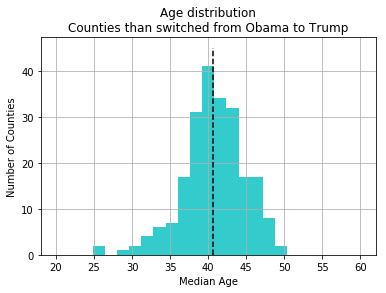

In [20]:
#Plot the chart
dem_rep_df["median_age"].plot(kind="hist", bins=25, alpha = 0.8, color = 'c', range =(20,60))

#Add y and x label, title, vertical line and grid
plt.xlabel("Median Age")
plt.ylabel("Number of Counties")
plt.title("Age distribution\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df["median_age"].mean(), ymin=0,ymax=45,linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/age_distribution_switched.png")

#Show chart
plt.show()

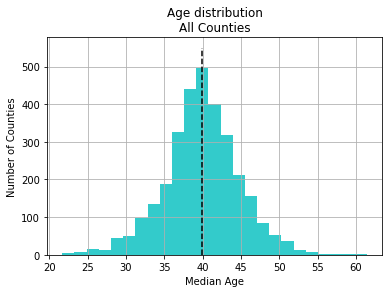

In [21]:
#Plot the chart
election_merged["median_age"].plot(kind="hist", bins=25, alpha = 0.8, color = 'c')

#Add y and x label, title, vertical line and grid
plt.xlabel("Median Age")
plt.ylabel("Number of Counties")
plt.title("Age distribution\nAll Counties")
plt.vlines(election_merged["median_age"].mean(), ymin=0,ymax=550, linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/age_ditribution_total.png")

#Show chart
plt.show()

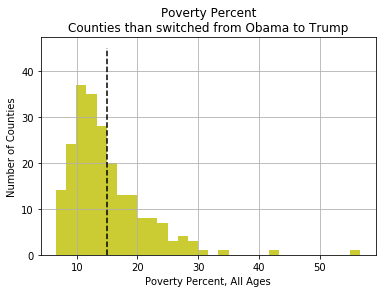

In [22]:
#Plot the chart
dem_rep_df['Poverty Percent, All Ages'].plot(kind="hist", bins=30, alpha = 0.8, color = 'y')

#Add y and x label, title, vertical line and grid
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df['Poverty Percent, All Ages'].mean(), ymin=0,ymax=45,linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/poverty_switched.png")

#Show chart
plt.show()

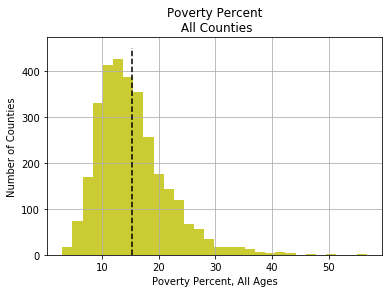

In [23]:
#Plot the chart
election_merged['Poverty Percent, All Ages'].plot(kind="hist", bins=30, alpha = 0.8, color = 'y')

#Add y and x label, title, vertical line and grid
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\n All Counties")
plt.vlines(election_merged['Poverty Percent, All Ages'].mean(), ymin=0,ymax=450,linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/age_ditribution_total.png")

#Show chart
plt.show()

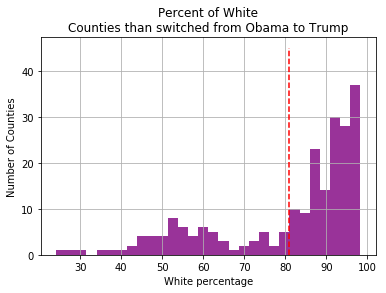

In [71]:
#Plot the chart
dem_rep_df['white'].plot(kind="hist", bins=30, alpha = 0.8, color = 'purple')

#Add y and x label, title, vertical line and grid
plt.xlabel("White percentage")
plt.ylabel("Number of Counties")
plt.title("Percent of White\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df['white'].mean(), ymin=0,ymax=45,colors = "r", linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/white_switched.png")

#show chart
plt.show()

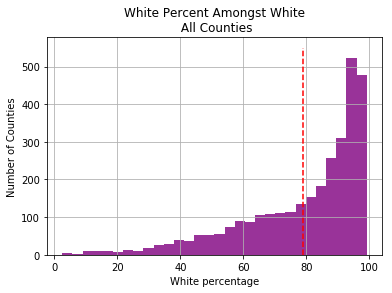

In [70]:
#Plot the chart
election_merged['white'].plot(kind="hist", bins=30, alpha = 0.8, color = 'purple')

#Add y and x label, title, vertical line and grid
plt.xlabel("White percentage")
plt.ylabel("Number of Counties")
plt.title("White Percent Amongst White\n All Counties")
plt.vlines(election_merged['white'].mean(), ymin=0,ymax=550, colors = "r", linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/white_total.png")

#Show plot
plt.show()

#### EXPLORE THE KEY SWING STATES FOR TRUMP: PA, MI, WI, OH 

In [62]:
#New DF for dem_rep in swing states
swing_state_df = dem_rep_df[(election_merged.state == "Pennsylvania") |
                                 (election_merged.state == "Michigan") |
                                 (election_merged.state == "Wisconsin") |
                                 (election_merged.state == "Ohio")]

#Show columns
swing_state_df.columns

C:\Users\mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_age', 'unemployment',
       'total_population', 'graduate_degree', 'at_least_bachelor_s_degree',
       'at_least_high_school_diploma', 'less_than_high_school',
       'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income'],
      dtyp

In [63]:
#Drop extraneous columns
swing_state_df = swing_state_df.drop(['Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_earnings_2010_dollars', 'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations'], axis=1)

#### Checking Out More Swing State Data...

In [64]:
#Show remaining columns
swing_state_df.columns

Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'median_age',
       'unemployment', 'total_population', 'graduate_degree',
       'at_least_bachelor_s_degree', 'at_least_high_school_diploma',
       'less_than_high_school', 'white', 'black', 'hispanic', 'asian',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income'],
      dtype='object')

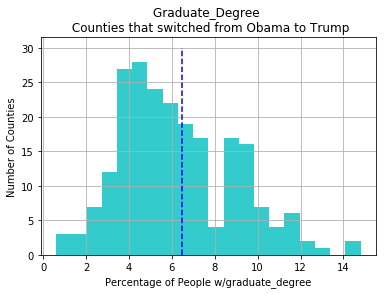

In [69]:
#Plot the chart
dem_rep_df['graduate_degree'].plot(kind="hist", bins=20, alpha = 0.8, color = 'c')

#Add y and x label, title, vertical line and grid
plt.xlabel("Percentage of People w/graduate_degree")
plt.ylabel("Number of Counties")
plt.title("Graduate_Degree \n Counties that switched from Obama to Trump")
plt.vlines(swing_state_df['graduate_degree'].mean(), ymin=0,ymax=30, colors = 'b', linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/grad_switched.png")

#Show chart
plt.show()

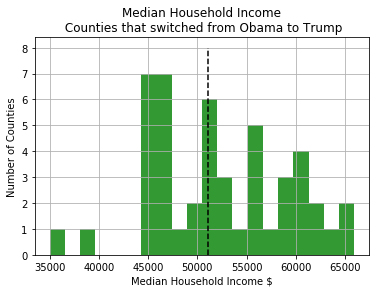

In [79]:
#Plot the chart
swing_state_df['Median Household Income'].plot(kind="hist", bins=20, alpha = 0.8, color = 'g')

#Add y and x label, title, vertical line and grid
plt.xlabel("Median Household Income $")
plt.ylabel("Number of Counties")
plt.title("Median Household Income\n Counties that switched from Obama to Trump")
plt.vlines(dem_rep_df['Median Household Income'].mean(), ymin=0,ymax=8, colors = 'black', linestyles ="dashed")
plt.grid()

#Save figure
plt.savefig("Images/income_switched.png")

#Show chart
plt.show()

In [82]:
#Show columns
dem_rep_df.columns

Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_age', 'unemployment',
       'total_population', 'graduate_degree', 'at_least_bachelor_s_degree',
       'at_least_high_school_diploma', 'less_than_high_school',
       'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income'],
      dtyp

In [83]:
#Analyze big swing states 
MI_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Michigan")])
WI_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Wisconsin")])
OH_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Ohio")])
PA_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Pennsylvania")])

In [84]:
round(swing_state_df.describe().T, 1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,47.0,2389.9,760.6,1249.0,1688.5,2302.0,3084.5,3124.0
median_age,47.0,41.0,4.3,25.1,39.1,40.7,43.2,48.7
unemployment,47.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1
total_population,47.0,115692.4,154977.0,7415.0,20374.5,60107.0,155585.0,834723.0
graduate_degree,47.0,6.4,2.0,2.3,5.1,6.5,7.5,11.6
at_least_bachelor_s_degree,47.0,18.7,4.7,8.5,15.4,18.6,22.2,29.3
at_least_high_school_diploma,47.0,87.7,2.3,79.7,86.6,87.7,89.1,92.5
less_than_high_school,47.0,12.3,2.3,7.5,10.9,12.3,13.4,20.3
white,47.0,89.6,6.6,71.1,85.7,91.2,95.1,98.0
black,47.0,3.7,4.5,0.2,0.4,2.1,5.1,20.4


#### MAP: EXPLORE IA - THE STATE WHERE THE MOST % COUNTIES FLIPPED FROM OBAMA TO TRUMP

In [85]:
#Geo Map for IA
geo_df = gpd.read_file('county.shp')

In [86]:
#Counties in IA that flipped dem to rep
Iowa =  dem_rep_df[dem_rep_df['state'] == 'Iowa']
Iowa.head()

,Unnamed: 0,state,Postal Code,county,Barack Obama,Mitt Romney,Other_2012,Total Votes_2012,Winner_2012,Margin_2012,...,farming_fishing_and_forestry_occupations,construction_extraction_maintenance_and_repair_occupations,management_professional_and_related_occupations,production_transportation_and_material_moving_occupations,sales_and_office_occupations,service_occupations,Dem_Votes_Percent_Change,Rep_Votes_Percent_Change,"Poverty Percent, All Ages",Median Household Income
760,801,Iowa,IA,Allamakee,3553,3264,117,6934,Barack Obama,289,...,2.30,12.10,25.60,24.7,18.35,17.0,-31.86,25.40,11.0,49445
765,806,Iowa,IA,Boone,7512,6556,320,14388,Barack Obama,956,...,1.40,9.05,30.25,18.3,24.10,17.0,-26.24,14.15,7.3,60558
766,807,Iowa,IA,Bremer,6763,6405,178,13346,Barack Obama,358,...,1.10,8.40,35.85,15.6,23.75,15.3,-20.80,12.54,7.1,64213
767,808,Iowa,IA,Buchanan,5911,4450,174,10535,Barack Obama,1461,...,1.75,11.65,29.10,22.2,20.85,14.5,-32.84,23.82,9.0,62294
773,814,Iowa,IA,Cedar,4972,4529,148,9649,Barack Obama,443,...,1.10,12.30,31.10,18.3,22.45,14.8,-27.61,16.91,6.9,63430


In [87]:
#IA Counties, switched from Dem to Rep X Poverty Percent, All Ages
Iowa_switch_poverty = Iowa[['state', 'county', 'Poverty Percent, All Ages']]
Iowa_switch_poverty.head()

,state,county,"Poverty Percent, All Ages"
760,Iowa,Allamakee,11.0
765,Iowa,Boone,7.3
766,Iowa,Bremer,7.1
767,Iowa,Buchanan,9.0
773,Iowa,Cedar,6.9


In [88]:
#All Counties in IA
election_merged.head()

,Unnamed: 0,state,Postal Code,county,Barack Obama,Mitt Romney,Other_2012,Total Votes_2012,Winner_2012,Margin_2012,...,management_professional_and_related_occupations,production_transportation_and_material_moving_occupations,sales_and_office_occupations,service_occupations,Dem_Votes_Percent_Change,Rep_Votes_Percent_Change,"Poverty Percent, All Ages",Median Household Income,Age Ranges,Median Income Ranges
0,0,Alabama,AL,Autauga,6363,17379,190,23932,Mitt Romney,11016,...,29.40,13.55,28.90,16.35,-6.71,4.56,13.4,58343,36-40,"$55,001-$65,000"
1,1,Alabama,AL,Baldwin,18424,66016,898,85338,Mitt Romney,47592,...,31.10,10.90,27.40,17.40,0.18,10.40,10.1,56607,41-45,"$55,001-$65,000"
2,2,Alabama,AL,Barbour,5912,5550,47,11509,Barack Obama,362,...,26.15,27.90,20.10,14.90,-17.61,-1.73,33.4,32490,36-40,"<$35,000"
3,3,Alabama,AL,Bibb,2202,6132,86,8420,Mitt Romney,3930,...,20.25,25.00,22.65,13.55,-14.90,9.88,20.2,45795,36-40,"$45,001-$55,000"
4,4,Alabama,AL,Blount,2970,20757,279,24006,Mitt Romney,17787,...,24.10,17.90,24.80,16.15,-27.41,10.13,12.8,48253,36-40,"$45,001-$55,000"


In [89]:
Iowa_all =  election_merged[election_merged['state'] == 'Iowa']
Iowa_all.head()

,Unnamed: 0,state,Postal Code,county,Barack Obama,Mitt Romney,Other_2012,Total Votes_2012,Winner_2012,Margin_2012,...,management_professional_and_related_occupations,production_transportation_and_material_moving_occupations,sales_and_office_occupations,service_occupations,Dem_Votes_Percent_Change,Rep_Votes_Percent_Change,"Poverty Percent, All Ages",Median Household Income,Age Ranges,Median Income Ranges
758,799,Iowa,IA,Adair,1790,2114,92,3996,Mitt Romney,324,...,30.8,23.50,22.15,12.00,-36.70,16.41,10.2,52155,41-45,"$45,001-$55,000"
759,800,Iowa,IA,Adams,1028,1108,49,2185,Mitt Romney,80,...,31.8,18.50,18.80,17.85,-45.04,25.90,12.3,48191,$46+,"$45,001-$55,000"
760,801,Iowa,IA,Allamakee,3553,3264,117,6934,Barack Obama,289,...,25.6,24.70,18.35,17.00,-31.86,25.40,11.0,49445,41-45,"$45,001-$55,000"
761,802,Iowa,IA,Appanoose,2951,3161,133,6245,Mitt Romney,210,...,29.2,21.25,23.35,16.65,-38.53,27.59,16.9,42274,41-45,"$35,001-$45,000"
762,803,Iowa,IA,Audubon,1611,1802,44,3457,Mitt Romney,191,...,31.8,19.15,17.65,20.90,-32.96,18.53,10.7,51484,$46+,"$45,001-$55,000"


In [90]:
#Grab relevant columns from previous Data Frame
Iowa_all_poverty = Iowa_all.loc[:, ['state', 'county', 'Poverty Percent, All Ages']]

In [41]:
#Rename county column for merging
Iowa_poverty_rate = Iowa_all_poverty.rename(columns={"county": "COUNTY"})

Iowa_poverty_rate.head()

,state,COUNTY,"Poverty Percent, All Ages"
758,Iowa,Adair,10.2
759,Iowa,Adams,12.3
760,Iowa,Allamakee,11.0
761,Iowa,Appanoose,16.9
762,Iowa,Audubon,10.7


In [42]:
# Merge together data frmae for Iowa counties that switched from Obama -> Trump with geopandas data
df_mergeIowa = geo_df.merge(Iowa_poverty_rate, left_on='COUNTY', right_on='COUNTY', suffixes=(False, False))

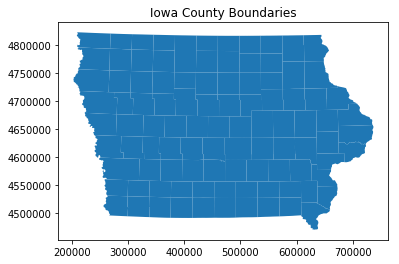

In [94]:
#Read the file
geo_df = gpd.read_file('county.shp')

#Plot the chart
geo_df.plot()

#Add title
plt.title("Iowa County Boundaries")

#Save figure
plt.savefig("Images/iowa_counties.png")

#Show chart
plt.show()

In [95]:
# Merge Iowa Geo and Iowa poverty
df_mergeIowa = geo_df.merge(Iowa_poverty_rate, left_on='COUNTY', right_on='COUNTY', suffixes=(False, False))
df_mergeIowa.head()

,Shape_Leng,Shape_Area,AREA,PERIMETER,CO_NUMBER,CO_FIPS,ACRES,FIPS,COUNTY,ST,geometry,state,"Poverty Percent, All Ages"
0,192784.420113,1.394780e+09,1.394780e+09,192783.7,56.0,111,344657.643007,19111,Lee,IA,"POLYGON ((634170.6760999998 4519205.2544, 6341...",Iowa,14.1
1,146566.360164,1.335647e+09,1.335647e+09,146566.5,4.0,7,330045.489981,19007,Appanoose,IA,"POLYGON ((530372.2120000003 4527603.236500001,...",Iowa,16.9
2,147784.689987,1.364467e+09,1.364467e+09,147785.1,93.0,185,337167.259929,19185,Wayne,IA,"POLYGON ((454680.1645 4527594.0056, 454692.977...",Iowa,16.6
3,148600.585139,1.381359e+09,1.381359e+09,148600.8,27.0,53,341341.146687,19053,Decatur,IA,"POLYGON ((435311.9610000001 4527873.7267, 4367...",Iowa,17.1
4,144994.231402,1.306355e+09,1.306355e+09,144995.3,26.0,51,322807.376878,19051,Davis,IA,"POLYGON ((569161.1946999999 4526464.8138, 5691...",Iowa,12.1


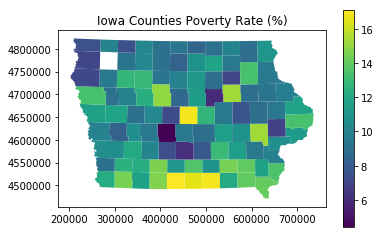

In [107]:
#Plot the chart
df_mergeIowa.plot(column = 'Poverty Percent, All Ages', legend = 'TRUE')

#Add title
plt.title("Iowa Counties Poverty Rate (%)")

#Save figure
plt.savefig("Images/iowa_counties_poverty.png")

#Show chart
plt.show()

In [108]:
Iowa_switch_poverty.head()

,state,COUNTY,"Poverty Percent, All Ages"
760,Iowa,Allamakee,11.0
765,Iowa,Boone,7.3
766,Iowa,Bremer,7.1
767,Iowa,Buchanan,9.0
773,Iowa,Cedar,6.9


In [109]:
#Rename county column for merging 
Iowa_switch_poverty.rename(columns={"county": "COUNTY"}, inplace = True)
Iowa_switch_poverty.head()

,state,COUNTY,"Poverty Percent, All Ages"
760,Iowa,Allamakee,11.0
765,Iowa,Boone,7.3
766,Iowa,Bremer,7.1
767,Iowa,Buchanan,9.0
773,Iowa,Cedar,6.9


In [110]:
#Create new merged DataFrame 
df_mergeIowa_switch = geo_df.merge(Iowa_switch_poverty, left_on='COUNTY', right_on='COUNTY', suffixes=(False, False))

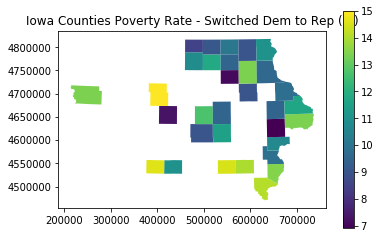

In [111]:
#Plot the chart
df_mergeIowa_switch.plot(column = 'Poverty Percent, All Ages', legend = 'TRUE')

#Add title
plt.title("Iowa Counties Poverty Rate - Switched Dem to Rep (%)")

#Save figure
plt.savefig("Images/iowa_counties_poverty_switched.png")

#Show chart
plt.show()